# Import Necessary Libraries

In [236]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.impute import SimpleImputer
from mpl_toolkits.mplot3d import Axes3D


In [237]:
df = pd.read_csv("C:/Users/aastha/Downloads/mini/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score (1-100)
0,1,Male,19.0,15,39
1,2,Male,NaN,15,81
2,3,Female,20.0,16,6
3,4,Female,23.0,16,77
4,5,Female,31.0,17,40


# Missing Values Treatment

In [238]:
df.dtypes

CustomerID                  int64
Gender                     object
Age                       float64
Annual Income               int64
Spending Score (1-100)      int64
dtype: object

In [239]:
df.shape

(200, 5)

In [240]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income',
       'Spending Score (1-100)'],
      dtype='object')

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     196 non-null    float64
 3   Annual Income           200 non-null    int64  
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [242]:
#finding duplicates
df.duplicated().sum()

0

In [243]:
df.isnull()

,CustomerID,Gender,Age,Annual Income,Spending Score (1-100)
0,False,False,False,False,False
1,False,False,True,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [244]:
#finding missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       4
Annual Income             0
Spending Score (1-100)    0
dtype: int64

In [245]:
df.isnull().sum().sum()

4

# Filling Null Values

In [246]:
df1 = df.fillna(value = 0)
df1

,CustomerID,Gender,Age,Annual Income,Spending Score (1-100)
0,1,Male,19.0,15,39
1,2,Male,0.0,15,81
2,3,Female,20.0,16,6
3,4,Female,23.0,16,77
4,5,Female,31.0,17,40
...,...,...,...,...,...
195,196,Female,35.0,120,79
196,197,Female,45.0,126,28
197,198,Male,32.0,126,74
198,199,Male,32.0,137,18


In [247]:
df1.isnull().sum().sum()

0

# Outlier Detection and Removal Treatment

In [248]:
columns_to_analyze = ['Age', 'Annual Income', 'Spending Score (1-100)']

# Function to detect and remove outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        
#       Calculating the first quartile (Q1) and third quartile (Q3)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
#       Computing the IQR
        IQR = Q3 - Q1
    
#       Defining the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
#       Filtering the DataFrame to remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df1_cleaned = remove_outliers(df1, columns_to_analyze)

print(df1_cleaned.head())

   CustomerID  Gender   Age  Annual Income  Spending Score (1-100)
0           1    Male  19.0             15                      39
1           2    Male   0.0             15                      81
2           3  Female  20.0             16                       6
3           4  Female  23.0             16                      77
4           5  Female  31.0             17                      40


# Normalization

In [249]:
scaler = MinMaxScaler()
df1_cleaned[columns_to_analyze] = scaler.fit_transform(df1_cleaned[columns_to_analyze])
print(df1_cleaned.head())

   CustomerID  Gender       Age  Annual Income  Spending Score (1-100)
0           1    Male  0.271429       0.000000                0.387755
1           2    Male  0.000000       0.000000                0.816327
2           3  Female  0.285714       0.009009                0.051020
3           4  Female  0.328571       0.009009                0.775510
4           5  Female  0.442857       0.018018                0.397959


# Elbow Method

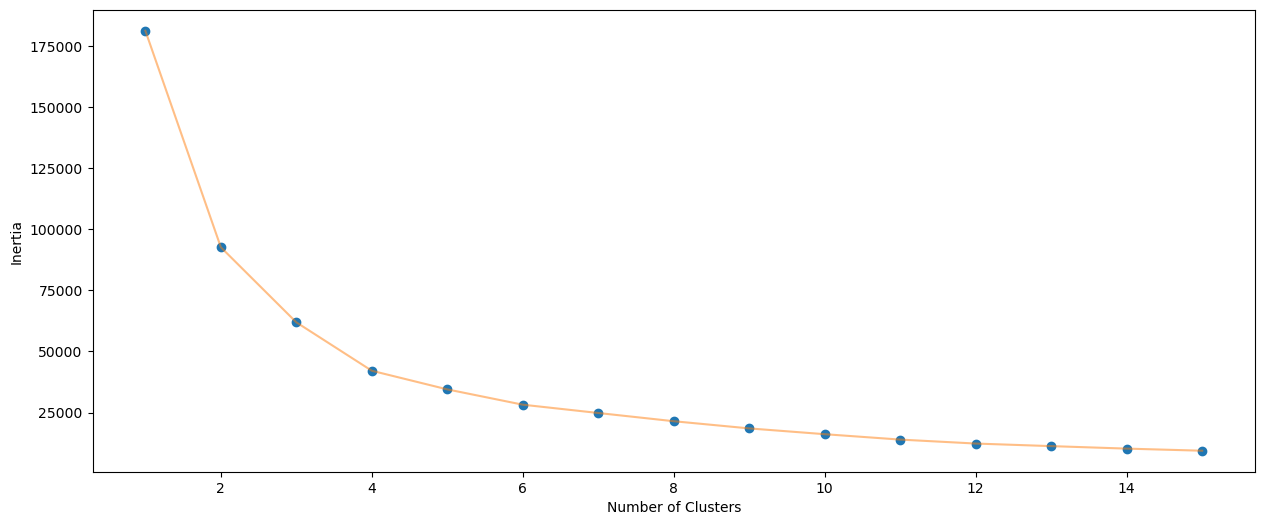

In [250]:
# Extract the relevant columns
X1 = df1[['Age', 'Annual Income']].values

# Initialize an empty list to store inertia values
inertia = []

# Determine the range dynamically from the length of the data or any other criteria
max_clusters = min(len(df1), 15)  # Set the maximum number of clusters to 15 or the length of data, whichever is smaller

# Loop over the range of cluster values
for n in range(1, max_clusters + 1):
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, 
                       tol=0.0001, random_state=111, algorithm='elkan')
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

# Plot the inertia values
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, max_clusters + 1), inertia, 'o')
plt.plot(np.arange(1, max_clusters + 1), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Implementation Of K-Mean

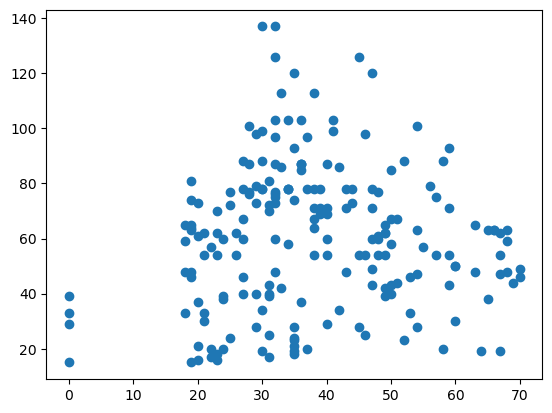

In [251]:
plt.scatter(df1['Age'], df1['Annual Income'])


In [252]:
def initialize_centroids(X, k):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    return centroids

def assign_clusters(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    clusters = np.argmin(distances, axis=0)
    return clusters

def update_centroids(X, clusters, k):
    new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])
    return new_centroids

def k_means_custom(X, k, max_iters=200):
    centroids = initialize_centroids(X, k)
    
    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, clusters

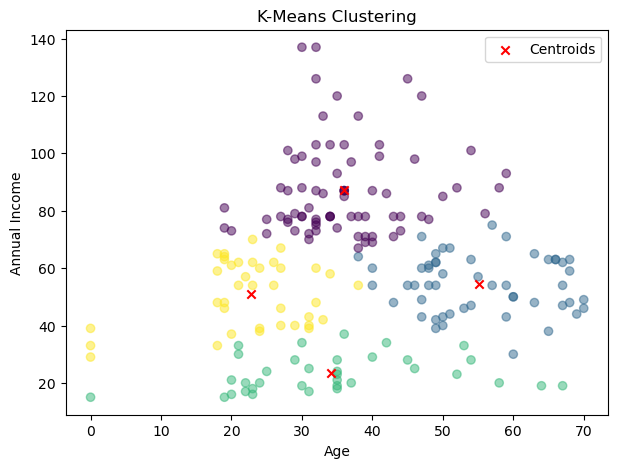

In [253]:
# Selecting the features for clustering
X = df1[['Age','Annual Income']].values 

# Specifying the number of clusters
k = 4

# Running custom K-Means algorithm
centroids, clusters = k_means_custom(X, k)

# Plotting the clusters
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', alpha=0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Centroids')

plt.xlabel('Age')
plt.ylabel('Annual Income') 
plt.title('K-Means Clustering')
plt.legend()
plt.show()


# Evaluating the Effectiveness of K-means Clustering

In [254]:
# Calculate Sum of Squared Errors (SSE)
sse = 0
for i in range(len(X)):
    centroid = centroids[clusters[i]]
    sse += np.sum((X[i] - centroid) ** 2)

print(f"Sum of Squared Errors (SSE): {sse}")

Sum of Squared Errors (SSE): 49564.731378446115


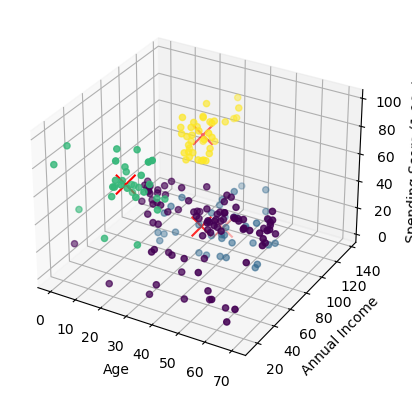

In [256]:

X = df1[['Age','Annual Income','Spending Score (1-100)']].values 

centroids, clusters = k_means_custom(X, 4)

# Once you have centroids and clusters, you can visualize them using plotting libraries like Matplotlib or Plotly.
# For example, with Matplotlib:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clusters, cmap='viridis')

# Plot centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', s=200, c='red')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score (1-100)')
plt.show()
